In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.fftpack import fft, fftfreq

- - -

    1) Dada 𝑥(𝑛) = { … 1, 0, 1, 2, 3, 2, 1, 0, 1, … }
                                  ↑
    a. Grafica la señal y sus espectros de magnitud y fase.
    b. Verifica la relación de Parseval evaluando la potencia en los dominios tiempo y frecuencia.

#### Apartado A

In [2]:
n1 = np.arange (-6,7) #vector de muestras
x1 = ([0,0,1,0,1,2,3,2,1,0,1,0,0]) 

<function matplotlib.pyplot.show(close=None, block=None)>

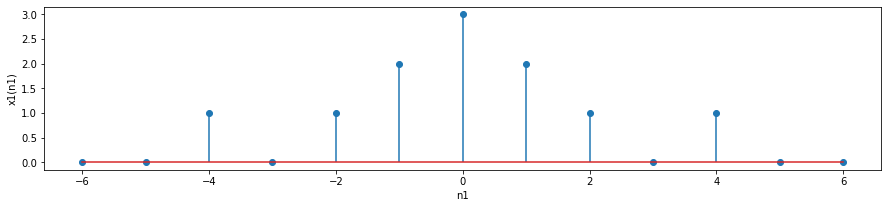

In [3]:
plt.figure(figsize=(15,3))
plt.stem (n1,x1)
plt.xlabel ("n1")
plt.ylabel ("x1(n1)")
plt.show

    Forma de teoría:

In [4]:
import import_ipynb
from FTransformaciones_tiempo_frecuencia import Espectro, señal
from FReconstrucciondeseñalesapartirdemuestras import h
from FTransformaciones_tf_de_una_señal_no_periodica import EspecCont

importing Jupyter notebook from FTransformaciones_tiempo_frecuencia.ipynb
importing Jupyter notebook from FReconstrucciondeseñalesapartirdemuestras.ipynb
importing Jupyter notebook from FTransformaciones_tf_de_una_señal_no_periodica.ipynb


In [5]:
Fs1 = 1
n1 = np.arange (-6,7)
t1 = n1/Fs1
espect1 = EspecCont(t1,x1,Fs1)

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show(close=None, block=None)>

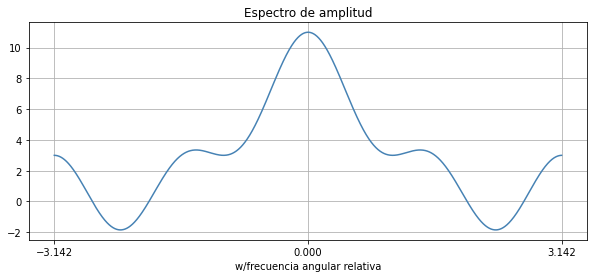

In [6]:
plt.figure (figsize=(10,4))
plt.plot (np.real (espect1[:,0]),espect1[:,1],"steelblue")
plt.xticks ([-np.pi,0,np.pi])
plt.xlabel ("w/frecuencia angular relativa")
plt.title ("Espectro de amplitud")
plt.grid (True)
plt.show

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


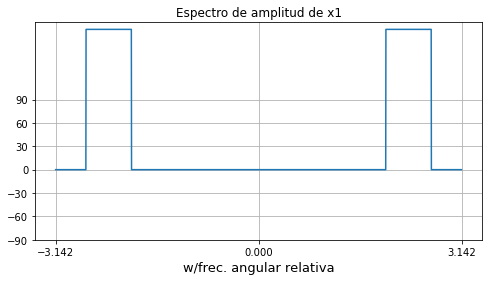

In [39]:
#ESPECTRO DE LA FASE

plt.figure(figsize=(8,4))
plt.plot(espect1[:,0],np.angle(espect1[:,1])*180/np.pi)
plt.xticks([-np.pi,0,np.pi])
plt.yticks(np.arange(-90,120,30))
plt.xlabel('w/frec. angular relativa', fontsize=13)
plt.title('Espectro de amplitud de x1')
plt.grid(True)
plt.show()

#### Apartado B

La fórmula de Parseval:

In [7]:
#DOMINIO DEl TIEMPO

E_t1 = np.sum (np.abs(x1)**2)
E_t1

21

In [8]:
#DOMINIO DE LA FRECUENCIA

E_f1 = np.sum ((abs(espect1)**2)/len(n1)) #módulo
E_f1

3736.903042866234

- - -

    2) Considera la señal 𝑥(𝑛) = 2 + 2𝑐𝑜𝑠 (𝜋𝑛/4) + 𝑐𝑜𝑠 (𝜋𝑛/2) + 1/2 𝑐𝑜𝑠 (3𝜋𝑛/4)
    a. Determina y dibuja el espectro de la densidad de potencia.
    b. Evalúa la potencia de la señal.

La señal de este punto si es períodica.

In [9]:
import import_ipynb
from FMCD_y_MCM import mcd, mcm, mcd_3

f1 = 1/8
f2 = 1/4
f3 = 3/8
frec1 = mcd (1,3)/mcm(8,4)
print (frec1)
print (1/frec1)

importing Jupyter notebook from FMCD_y_MCM.ipynb
0.125
8.0


#### Apartado A

In [10]:
n2 = np.arange (0,72) #contador, debe ser multiplo de 8
x2 = 2 + (2*np.cos(np.pi*n2/4)) + np.cos(np.pi*n2/2) + ((1/2)*np.cos(3*np.pi*n2/4))

    Fs / frec de la señal = N de muestras  --> de ahí obtengo el 8

<function matplotlib.pyplot.show(close=None, block=None)>

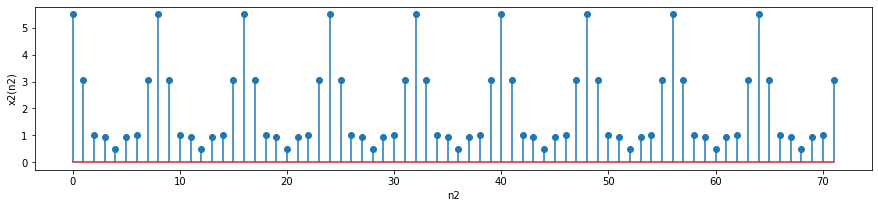

In [11]:
plt.figure(figsize=(15,3))
plt.stem (n2,x2)
plt.xlabel ("n2")
plt.ylabel ("x2(n2)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

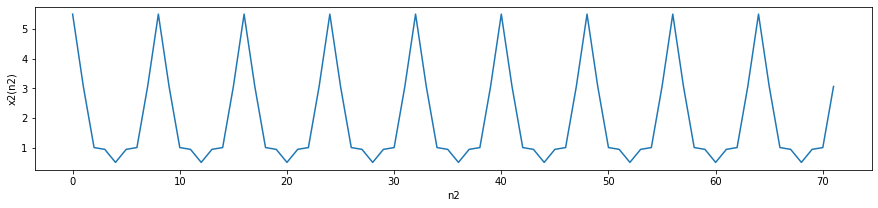

In [12]:
plt.figure(figsize=(15,3))
plt.plot (n2,x2)
plt.xlabel ("n2")
plt.ylabel ("x2(n2)")
plt.show

In [13]:
N2 = 72 #número total de muestras (cantidad de puntos)
Fs2 = 10
c2 = Espectro(x2) #Espectro de la señal muestreada
p2 = np.arange(N2) #Contador en el dominio de la frecuencia

In [14]:
#FILTRAMOS EL ESPECTRO, para que todos los puntos sean muy pequeños, los filtramos
for i in p2:
    if (abs(c2.real[i])<0.001):
        c2.real[i]=0
    if (abs(c2.imag[i])<0.001):
        c2.imag[i]=0

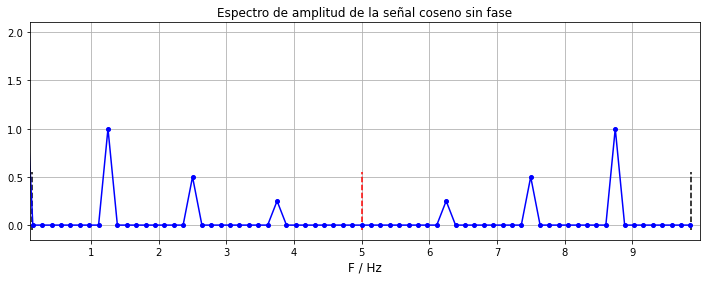

In [15]:
#ESPECTRO DE AMPLITUD

xlv = np.array([frec1,Fs2-frec1]) #Líneas Verticales
plt.figure(figsize=(12,4))

plt.plot(p2*(Fs2/N2),abs(c2), '.-',color='b',ms=8)

plt.vlines(xlv,-0.05,0.55, linestyles='dashed',color='k')
plt.vlines(Fs2/2,-0.05,0.55, linestyles='dashed',color='r')

plt.xlim (0.1,10)
plt.xticks(np.arange(1,10,1))
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud de la señal coseno sin fase')
plt.grid(True)
plt.show()

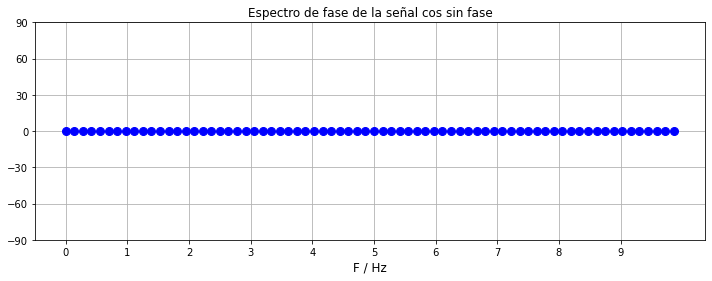

In [16]:
#ESPECTRO DE LA FASE

xlv = np.array([frec1,Fs2-frec1])
plt.figure(figsize=(12,4))
plt.plot(p2*(Fs2/N2),np.angle(c2)*180/np.pi, 'o',color='b',ms=8)

plt.vlines(xlv,-0.05,0.55, linestyles='dashed',color='k')
plt.vlines(Fs2/2,-0.05,0.55, linestyles='dashed',color='r')

plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(-90,120,30))

plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de fase de la señal cos sin fase')
plt.grid(True)
plt.show()

#### Apartado B

In [17]:
#DOMINIO DEl TIEMPO

E_t2 = np.sum (np.abs(x2)**2)
E_t2

477.0000000000001

In [18]:
#DOMINIO DE LA FRECUENCIA

E_f2 = np.sum ((modulo2**2)/len(n2))
E_f2

NameError: name 'modulo2' is not defined

- - -

    3) Encuentra y grafica el espectro de módulo y fase las siguientes señales:

    a. 𝑥(𝑛) = 𝑎**|𝑛| , con |𝑎| < 1

In [ ]:
n3a = np.arange (-10,10)
a = 0.5
x3a = a**(abs(n3a)) 

<function matplotlib.pyplot.show(close=None, block=None)>

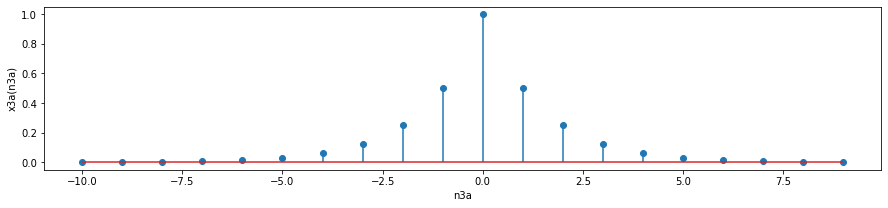

In [ ]:
plt.figure(figsize=(15,3))
plt.stem (n3a,x3a)
plt.xlabel ("n3a")
plt.ylabel ("x3a(n3a)")
plt.show

In [ ]:
Fs3a = 1
t3a = n3a/Fs3a
espect3a = EspecCont(t3a,x3a,Fs3a)

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show(close=None, block=None)>

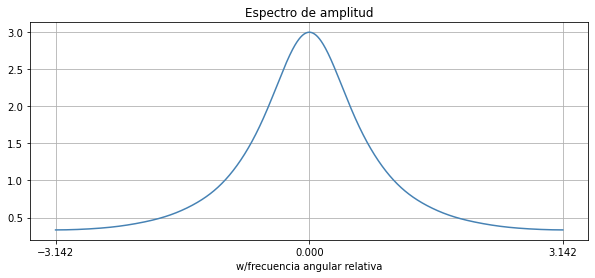

In [ ]:
#ESPECTRO DE AMPLITUD

plt.figure (figsize=(10,4))
plt.plot (np.real (espect3a[:,0]),espect3a[:,1],"steelblue")
plt.xticks ([-np.pi,0,np.pi])
plt.xlabel ("w/frecuencia angular relativa")
plt.title ("Espectro de amplitud")
plt.grid (True)
plt.show

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


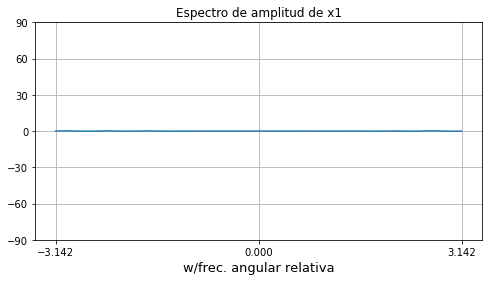

In [ ]:
#ESPECTRO DE LA FASE

plt.figure(figsize=(8,4))
plt.plot(espect3a[:,0],np.angle(espect3a[:,1])*180/np.pi)
plt.xticks([-np.pi,0,np.pi])
plt.yticks(np.arange(-90,120,30))
plt.xlabel('w/frec. angular relativa', fontsize=13)
plt.title('Espectro de amplitud de x1')
plt.grid(True)
plt.show()

    b. 𝑥(𝑛) = 𝐴 cos(𝜔o 𝑛 + 𝜑)

In [ ]:
t3b = np.arange(0,10,0.001)
F0 = 1 #frecuencia de la señal
x3b = np.cos ((2*np.pi*F0*t3b) + (np.pi/4) )


#MUESTREAMOS
N3b = 20 #número total de muestras (cantidad de puntos)
n3b = np.arange(N3b) #contador de las muestras
Fs3b = 10 #frecuencia de muestreo
x_3b = 1 * np.cos(2*np.pi*(F0/Fs3b)*n3b + (np.pi/4) ) #señal muestreada

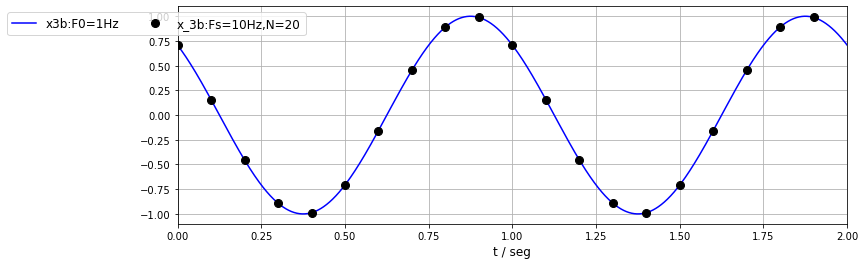

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(t3b,x3b, 'b')
plt.plot(n3b/Fs3b,x_3b, 'ok',ms=8)
plt.xlim(0,2)
plt.xlabel('t / seg', fontsize=12)
plt.legend(('x3b:F0=1Hz','x_3b:Fs=10Hz,N=20'),ncol=2,prop={'size':12},bbox_to_anchor=(0.2,1))
plt.grid(True)
plt.show()

In [ ]:
c3b = Espectro(x_3b) #Espectro de la señal muestreada
p3b = np.arange(N3b) #Contador en el dominio de la frecuencia

In [ ]:
#FILTRAMOS EL ESPECTRO, para que todos los puntos sean muy pequeños, los filtramos
for i in p3b:
    if (abs(c3b.real[i])<0.001):
        c3b.real[i]=0
    if (abs(c3b.imag[i])<0.001):
        c3b.imag[i]=0

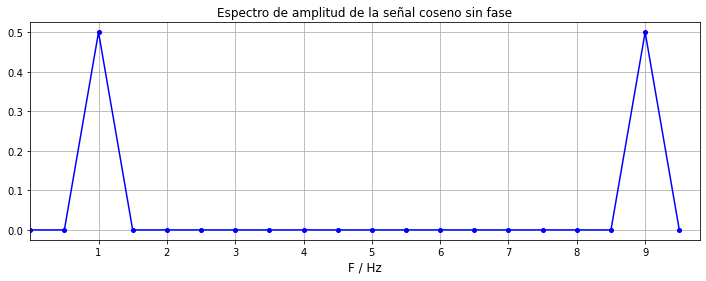

In [ ]:
#ESPECTRO DE AMPLITUD

plt.figure(figsize=(12,4))
plt.plot ( p3b*(Fs3b/N3b) , abs(c3b) , '.-',color='b',ms=8)


plt.xlim (0,9.8)
plt.xticks(np.arange(1,10,1))
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud de la señal coseno sin fase')
plt.grid(True)
plt.show()

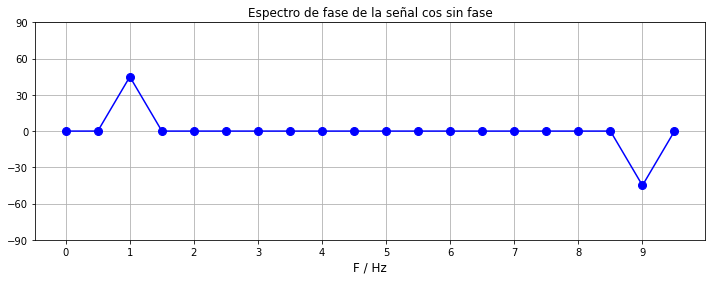

In [ ]:
#ESPECTRO DE LA FASE

plt.figure(figsize=(12,4))
plt.plot(p3b*(Fs3b/N3b),np.angle(c3b)*180/np.pi, 'o-',color='b',ms=8)


plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(-90,120,30))

plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de fase de la señal cos sin fase')
plt.grid(True)
plt.show()

    c. 𝑥(𝑛) = 𝐴 sin(𝜔0𝑛 + 𝜑)

In [ ]:
t3c = np.arange(0,10,0.001)
F3c = 1 #frecuencia de la señal
x3c = np.sin ((2*np.pi*F3c*t3c) + (np.pi/4) )


#MUESTREAMOS
N3c = 20 #número total de muestras (cantidad de puntos)
n3c = np.arange(N3c) #contador de las muestras
Fs3c = 10 #frecuencia de muestreo
x_3c = 1 * np.sin(2*np.pi*(F3c/Fs3c)*n3c + (np.pi/4) ) #señal muestreada

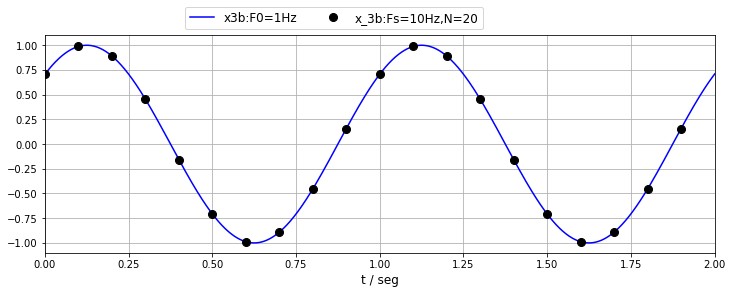

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(t3c,x3c, 'b')
plt.plot(n3c/Fs3c,x_3c, 'ok',ms=8)
plt.xlim(0,2)
plt.xlabel('t / seg', fontsize=12)
plt.legend(('x3b:F0=1Hz','x_3b:Fs=10Hz,N=20'),ncol=2,prop={'size':12},bbox_to_anchor=(0.2,1))
plt.grid(True)
plt.show()

In [ ]:
c3c = Espectro(x_3c) #Espectro de la señal muestreada
p3c = np.arange(N3c) #Contador en el dominio de la frecuencia


#FILTRAMOS EL ESPECTRO, para que todos los puntos sean muy pequeños, los filtramos
for i in p3c:
    if (abs(c3c.real[i])<0.001):
        c3c.real[i]=0
    if (abs(c3c.imag[i])<0.001):
        c3c.imag[i]=0

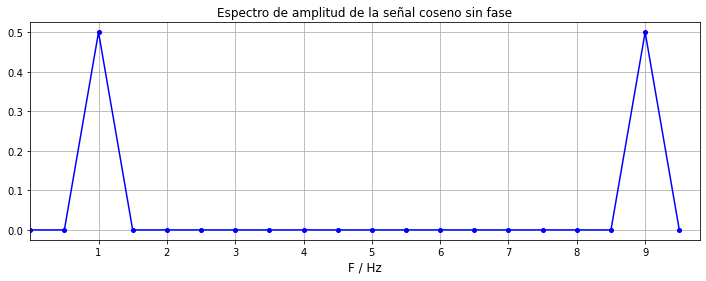

In [ ]:
#ESPECTRO DE AMPLITUD

plt.figure(figsize=(12,4))
plt.plot ( p3c*(Fs3c/N3c) , abs(c3c) , '.-',color='b',ms=8)


plt.xlim (0,9.8)
plt.xticks(np.arange(1,10,1))
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud de la señal coseno sin fase')
plt.grid(True)
plt.show()

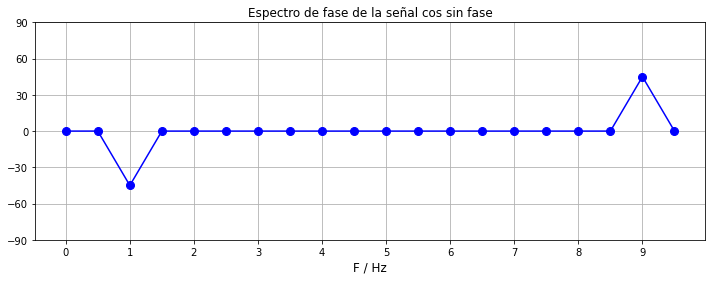

In [ ]:
#ESPECTRO DE LA FASE

plt.figure(figsize=(12,4))
plt.plot(p3c*(Fs3c/N3c),np.angle(c3c)*180/np.pi, 'o-',color='b',ms=8)


plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(-90,120,30))

plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de fase de la señal cos sin fase')
plt.grid(True)
plt.show()

    d. 𝑥(𝑛) = 𝑢(𝑛)

In [19]:
n3d = np.arange (-10,11)
x3d = lambda n: np.piecewise (n, [n > 0] , [lambda n: 1, lambda n: 0])

<function matplotlib.pyplot.show(close=None, block=None)>

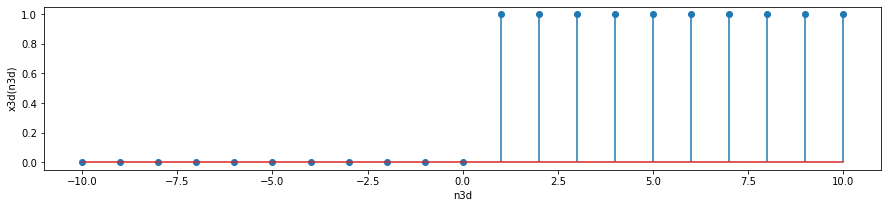

In [20]:
plt.figure(figsize=(15,3))
plt.stem (n3d,x3d(n3d))
plt.xlabel ("n3d")
plt.ylabel ("x3d(n3d)")
plt.show

In [29]:
N3d = 21
Fs3d = 1
c3d = Espectro(x3d(n3d)) #Espectro de la señal muestreada
p3d = np.arange(N3d) #Contador en el dominio de la frecuencia


#FILTRAMOS EL ESPECTRO, para que todos los puntos sean muy pequeños, los filtramos
for i in p3d:
    if (abs(c3d.real[i])<0.001):
        c3d.real[i]=0
    if (abs(c3d.imag[i])<0.001):
        c3d.imag[i]=0

In [30]:
len (c3d)

21

In [27]:
len (p3d*(Fs3d/N3d))

20

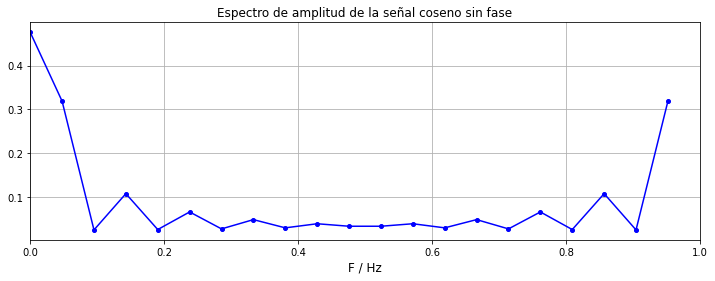

In [36]:
#ESPECTRO DE AMPLITUD

plt.figure(figsize=(12,4))
plt.plot ( p3d*(Fs3d/N3d) , abs(c3d) , '.-',color='b',ms=8)


plt.xlim (0,1)
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud de la señal coseno sin fase')
plt.grid(True)
plt.show()

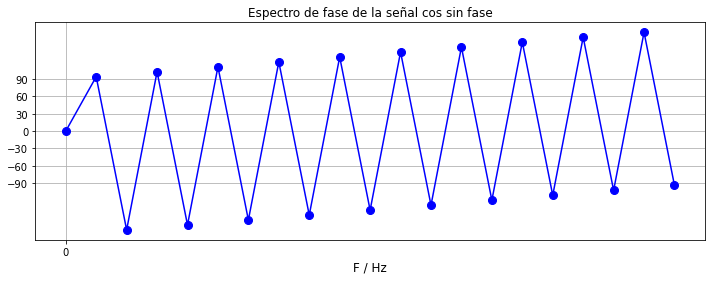

In [38]:
#ESPECTRO DE LA FASE

plt.figure(figsize=(12,4))
plt.plot(p3d*(Fs3d/N3d),np.angle(c3d)*180/np.pi, 'o-',color='b',ms=8)


plt.xticks(np.arange(0,1))
plt.yticks(np.arange(-90,120,30))

plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de fase de la señal cos sin fase')
plt.grid(True)
plt.show()

    e. 𝑥(𝑛) = sin(𝜋𝑛/2) / 𝜋𝑛

In [ ]:
n3e1 = np.arange (-10,0)
n3e2 = np.arange (1,11)
n3e = np.concatenate ((n3e1,n3e2))
x3e = (np.sin (np.pi*n3e/2)) / (n3e*np.pi)

<function matplotlib.pyplot.show(close=None, block=None)>

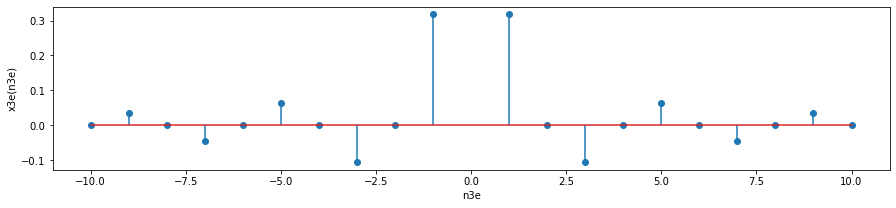

In [ ]:
plt.figure(figsize=(15,3))
plt.stem (n3e,x3e)
plt.xlabel ("n3e")
plt.ylabel ("x3e(n3e)")
plt.show

In [ ]:
Fs3e = 1
t3e = n3e/Fs3e
espect3e = EspecCont(t3e,x3e,Fs3e)

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show(close=None, block=None)>

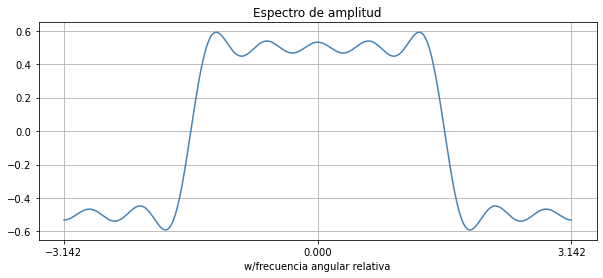

In [ ]:
#ESPECTRO DE AMPLITUD

plt.figure (figsize=(10,4))
plt.plot (np.real (espect3e[:,0]),espect3e[:,1],"steelblue")
plt.xticks ([-np.pi,0,np.pi])
plt.xlabel ("w/frecuencia angular relativa")
plt.title ("Espectro de amplitud")
plt.grid (True)
plt.show

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


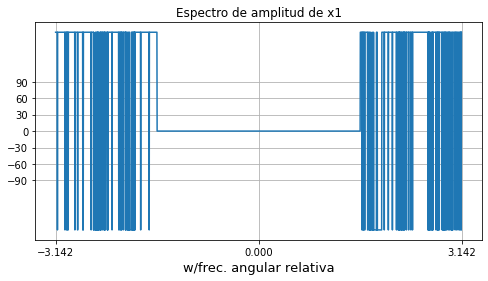

In [ ]:
#ESPECTRO DE LA FASE

plt.figure(figsize=(8,4))
plt.plot(espect3e[:,0],np.angle(espect3e[:,1])*180/np.pi)
plt.xticks([-np.pi,0,np.pi])
plt.yticks(np.arange(-90,120,30))
plt.xlabel('w/frec. angular relativa', fontsize=13)
plt.title('Espectro de amplitud de x1')
plt.grid(True)
plt.show()

    f. 𝑥(𝑛) = (1/2) ** (n−1) * 𝑢(𝑛 − 1)

In [ ]:
n3f = np.arange (-4,11)
u3f = lambda n: np.piecewise (n, [n > 0] , [lambda n: 1, lambda n: 0])

x3f = ( (1/2)**(n3f-1) ) * u3f (n3f-1)

<function matplotlib.pyplot.show(close=None, block=None)>

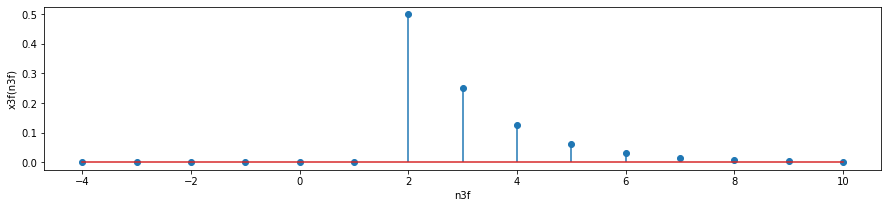

In [ ]:
plt.figure(figsize=(15,3))
plt.stem (n3f,x3f)
plt.xlabel ("n3f")
plt.ylabel ("x3f(n3f)")
plt.show

In [ ]:
Fs3f = 10
t3f = n3f/Fs3f
espect3f = EspecCont(t3f,x3f,Fs3f)

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show(close=None, block=None)>

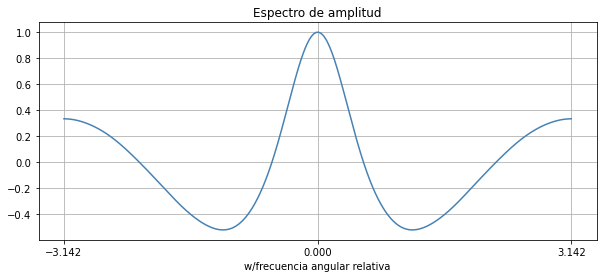

In [ ]:
#ESPECTRO DE AMPLITUD

plt.figure (figsize=(10,4))
plt.plot (np.real (espect3f[:,0]),espect3f[:,1],"steelblue")
plt.xticks ([-np.pi,0,np.pi])
plt.xlabel ("w/frecuencia angular relativa")
plt.title ("Espectro de amplitud")
plt.grid (True)
plt.show

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


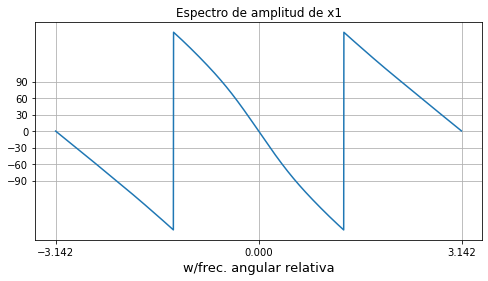

In [ ]:
#ESPECTRO DE LA FASE

plt.figure(figsize=(8,4))
plt.plot(espect3f[:,0],np.angle(espect3f[:,1])*180/np.pi)
plt.xticks([-np.pi,0,np.pi])
plt.yticks(np.arange(-90,120,30))
plt.xlabel('w/frec. angular relativa', fontsize=13)
plt.title('Espectro de amplitud de x1')
plt.grid(True)
plt.show()

- - -

    4. Supón que la siguiente función 𝑝(𝑡) representa una señal de presión arterial, la cual está definida de la siguiente forma:

    𝑝(𝑡) = 𝐶 +∑𝐴𝑖 𝑐𝑜𝑠 (𝜔𝑖 𝑡 − 𝜙𝑖) i=1,2,3,4

    donde:
    C = 80
    w = [1 2 3 4]2𝜋𝑓𝑐 ; 𝑓𝑐 es la frecuencia cardiaca.
    A =[ 20.0000 10.0240 3.5560 0.9800];
    phi = [0 -0.5655 1.0053 -2.1363];

    a. Muestrea la señal con una 𝑓𝑠 = 200Hz y grafique la señal 𝑝(𝑡) y 𝑝(𝑛).

    b. Encuentra y dibuja la Transformada Discreta de Fourier (TDF) de 𝑝(𝑛).
    Nota: recuerde adoptar valores de t y de 𝑓c para que la cantidad de datos muestreados correspondan a ciclos cardiacos completos.

    c. Ahora adopte valores de t o 𝑓𝑐 de modo que la cantidad de datos muestreados no correspondan a ciclos completos y vuelva a obtener la
    TDF. ¿Qué sucede con los espectros en este caso?.

    d. Contamine su señal con ruido de línea de 50Hz de baja amplitud, muestree con fs = 200Hz y obtenga los espectros (TDF).
    
    e. Ahora muestree la misma señal con 𝑓𝑠 = 70Hz y 80Hz y obtenga los espectros (TDF) para cada frecuencia de muestreo. Compare los espectros y responda: ¿Qué cambió? ¿Qué puede concluir respecto del ruido?.

#### Apartado A

In [ ]:
C4 = 80
Fc4 = 90/60
w4 = np.array([ 1 , 2 , 3 , 4 ])*2*np.pi*Fc4
A4 = np.array([ 20.0000 , 10.0240 , 3.5560 , 0.9800 ])
o4 = np.array([ 0 , -0.5655 , 1.0053 , -2.1363 ])
Fs = 200

In [ ]:
Fs/Fc4

133.33333333333334

In [ ]:
N4 = 1000
n4 = np.arange (0,1000)
t4 = n4/Fs

"""
OTRA FORMA DE DEFINIR:
tiempo = 5
t = np.linspace ( 0 , tiempo - 1/Fs , tiempo*Fs )
"""

P4 = np.zeros (N4)

for j in n4:
    P4 [j] = C4 + sum ( A4 * np.cos(w4 * t4[j] - o4 ))

<function matplotlib.pyplot.show(close=None, block=None)>

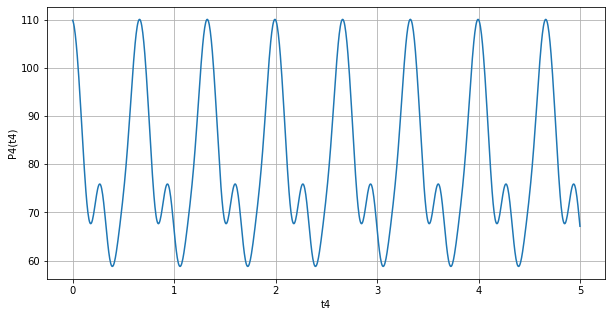

In [ ]:
plt.figure(figsize=(10,5))
plt.plot (t4,P4)
plt.xlabel ("t4")
plt.ylabel ("P4(t4)")
plt.grid (True)
plt.show

#### Apartado B

Fc = 60 ppm --> 1 Hz 

Fc = 90 ppm --> 1.5 Hz (200 muestras)

400 muestras tenemos tres ciclos completos.

1 ciclo y medio --- 200

1 ciclo --- 133,33 muestras

3 ciclos --- 400 muestras

    NECESITO CICLOS COMPLETOS!!!

In [ ]:
h4 = fft (P4[0:400])/len (P4[0:400])
w4 = np.linspace (0,np.pi,len(P4[0:400]))

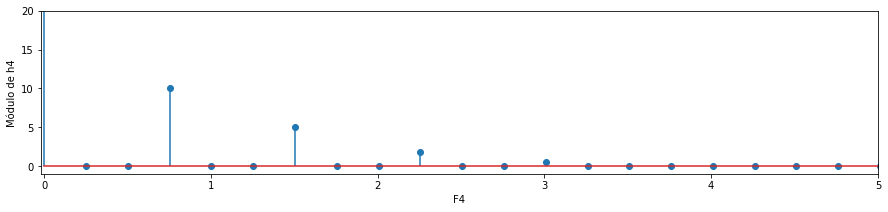

In [ ]:
plt.figure(figsize=(15,3))
plt.stem (w4*Fs/(2*np.pi),abs(h4))
plt.xlim (-0.02,5)
plt.ylim (-1,20)
plt.ylabel ("Módulo de h4")
plt.xlabel ("F4")
plt.show ()

#### Apartado C

In [ ]:
h_4 = fft (P4[0:300])/len (P4[0:300])
w_4 = np.linspace (0,np.pi,len(P4[0:300]))

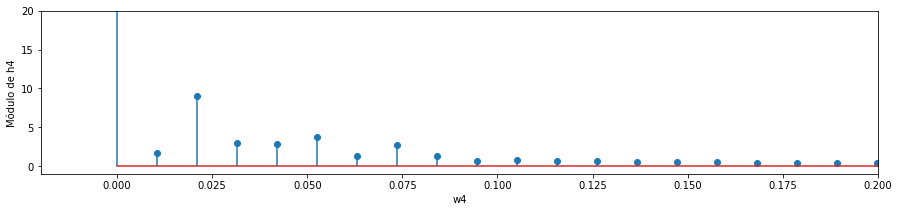

In [ ]:
plt.figure(figsize=(15,3))
plt.stem (w_4,abs(h_4))
plt.xlim (-0.02,0.20)
plt.ylim (-1,20)
plt.ylabel ("Módulo de h4")
plt.xlabel ("w4")
plt.show ()

Como no tomamos un valor multiplo, los valores "nulos" dejan de ser nulos. IMPURIAS

#### Apartado D

In [ ]:
ruido = 1*np.sin(2*np.pi*50*t4)

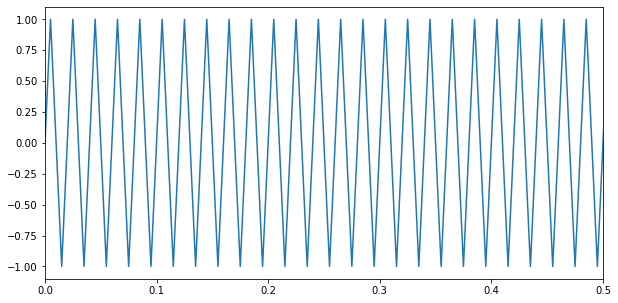

In [ ]:
plt.figure(figsize=(10,5))
plt.plot (t4,ruido)
plt.xlim(0,0.5)
plt.show ()

In [ ]:
P_4 = P4 + ruido

<function matplotlib.pyplot.show(close=None, block=None)>

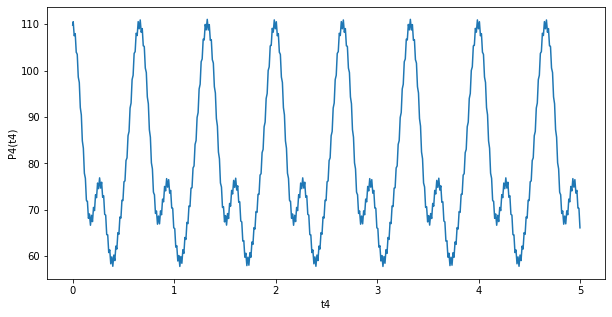

In [ ]:
plt.figure(figsize=(10,5))
plt.plot (t4,P_4)
plt.xlabel ("t4")
plt.ylabel ("P4(t4)")
plt.show

In [ ]:
h_4e = fft (P4)/len (P4)
w_4e = np.linspace (0,np.pi,len(P4))

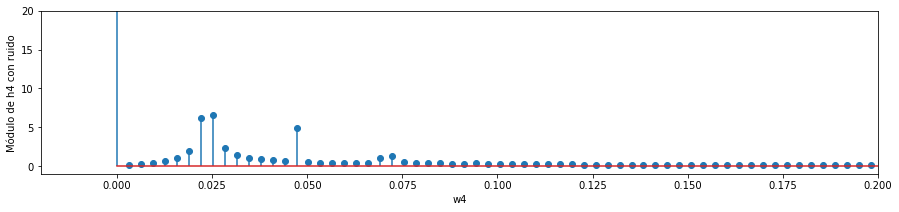

In [ ]:
plt.figure(figsize=(15,3))
plt.stem (w_4e,abs(h_4e))
plt.xlim (-0.02,0.20)
plt.ylim (-1,20)
plt.ylabel ("Módulo de h4 con ruido")
plt.xlabel ("w4")
plt.show ()

#### Apartado E

In [ ]:
C4 = 80
Fc4 = 90/60
w4 = np.array([ 1 , 2 , 3 , 4 ])*2*np.pi*Fc4
A4 = np.array([ 20.0000 , 10.0240 , 3.5560 , 0.9800 ])
o4 = np.array([ 0 , -0.5655 , 1.0053 , -2.1363 ])
Fs_1 = 80

In [ ]:
Fs_1/Fc4

53.333333333333336

1 ciclo y medio --- 80

3 ciclos --- 160 muestras

In [ ]:
N4 = 1000
n4 = np.arange (0,1000)
t4 = n4/Fs_1

"""
OTRA FORMA DE DEFINIR:
tiempo = 5
t = np.linspace ( 0 , tiempo - 1/Fs , tiempo*Fs )
"""

P4_1 = np.zeros (N4)
for j in n4:
    P4_1 [j] = C4 + sum ( A4 * np.cos(w4 * t4[j] - o4 ))

<function matplotlib.pyplot.show(close=None, block=None)>

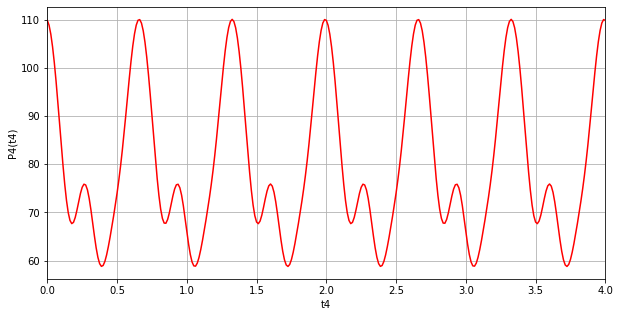

In [ ]:
plt.figure(figsize=(10,5))
plt.plot (t4,P4_1, color="red")
plt.xlim (0,4)
plt.xlabel ("t4")
plt.ylabel ("P4(t4)")
plt.grid (True)
plt.show

In [ ]:
h4_1 = fft (P4_1[0:160])/len (P4_1[0:160])
w4_1 = np.linspace (0,np.pi,len(P4_1[0:160]))

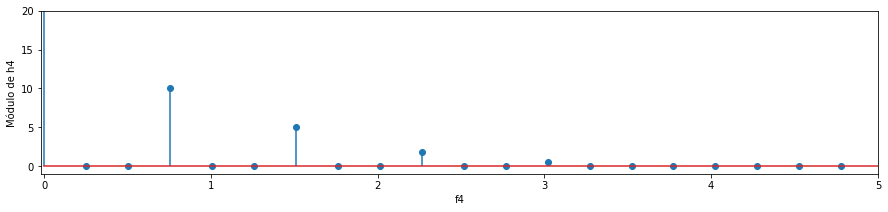

In [ ]:
plt.figure(figsize=(15,3))
plt.stem (w4_1*Fs_1/(2*np.pi),abs(h4_1))
plt.xlim (-0.02,5)
plt.ylim (-1,20)
plt.ylabel ("Módulo de h4")
plt.xlabel ("f4")
plt.show ()

w4 = 2*np.pi*k/N => Fc = w4 * Fs/(2*pi)

Fs2 < Fs1 = 80 < 200

Las frecuencias en Hz son las mismas para las componentes pero cambia la frecuecncia angular rel w4

Tengo menos muestras por lo que mi distancia entre muestras es myor

<function matplotlib.pyplot.show(close=None, block=None)>

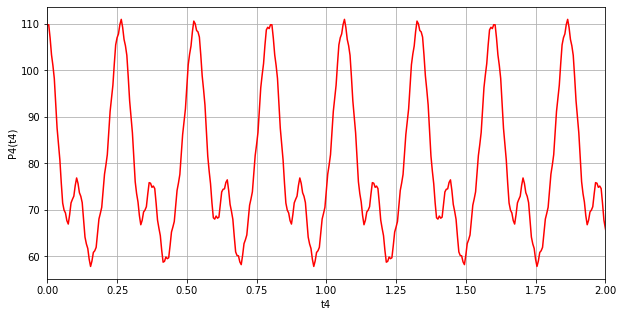

In [ ]:
plt.figure(figsize=(10,5))
plt.plot (t4,P4_1+ruido, color="red")
plt.xlim (0,2)
plt.xlabel ("t4")
plt.ylabel ("P4(t4)")
plt.grid (True)
plt.show

In [ ]:
C4 = 80
Fc4 = 90/60
w4 = np.array([ 1 , 2 , 3 , 4 ])*2*np.pi*Fc4
A4 = np.array([ 20.0000 , 10.0240 , 3.5560 , 0.9800 ])
o4 = np.array([ 0 , -0.5655 , 1.0053 , -2.1363 ])
Fs_2 = 70

In [ ]:
N4 = 1000
n4 = np.arange (0,1000)
t4 = n4/Fs_2

"""
OTRA FORMA DE DEFINIR:
tiempo = 5
t = np.linspace ( 0 , tiempo - 1/Fs , tiempo*Fs )
"""

P4_2 = np.zeros (N4)
for j in n4:
    P4_2 [j] = C4 + sum ( A4 * np.cos(w4 * t4[j] - o4 ))

<function matplotlib.pyplot.show(close=None, block=None)>

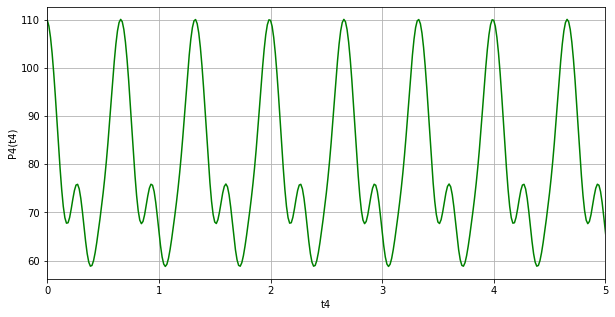

In [ ]:
plt.figure(figsize=(10,5))
plt.plot (t4,P4_2,color="green")
plt.xlim (0,5)
plt.xlabel ("t4")
plt.ylabel ("P4(t4)")
plt.grid (True)
plt.show

1 ciclo y medio --- 70

3 ciclos --- 140 muestras

In [ ]:
h4_2 = fft (P4_2[0:140])/len (P4_2[0:140])
w4_2 = np.linspace (0,np.pi,len(P4_2[0:140]))

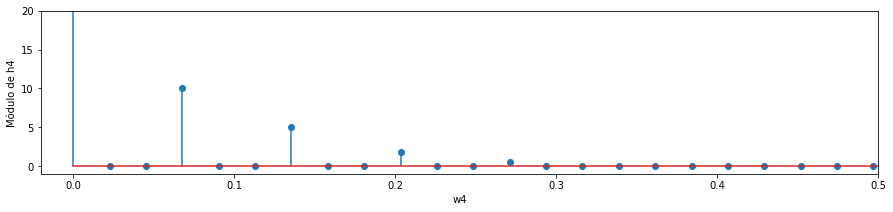

In [ ]:
plt.figure(figsize=(15,3))
plt.stem (w4_2,abs(h4_2))
plt.xlim (-0.02,0.50)
plt.ylim (-1,20)
plt.ylabel ("Módulo de h4")
plt.xlabel ("w4")
plt.show ()

Varian en distancia pero no en amplitud

<function matplotlib.pyplot.show(close=None, block=None)>

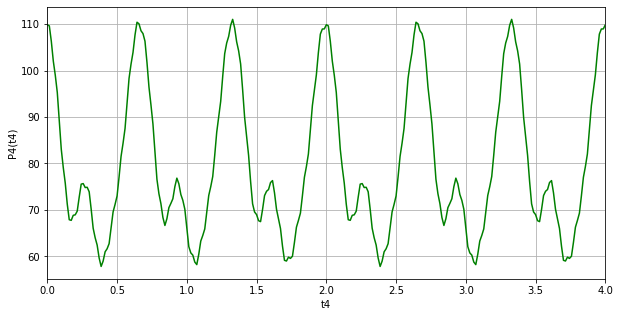

In [ ]:
plt.figure(figsize=(10,5))
plt.plot (t4,P4_2+ruido, color="green")
plt.xlim (0,4)
plt.xlabel ("t4")
plt.ylabel ("P4(t4)")
plt.grid (True)
plt.show

- - -

    5) Responda las mismas consignas del ítem 14. pero esta vez considerando la señal dada por:
    ℎ(𝑡) = 80 + ∑ [2√80𝜋(2𝑛2−1)𝑐𝑜𝑠 [2𝜋(𝑛 − 1)𝑓𝑐𝑡 − (3𝑛3 − 1)𝜋7]]3𝑛=1; 𝑓𝑐 = 1.89

#### APARTADO A

Para sacar la frecuencia de la señal:

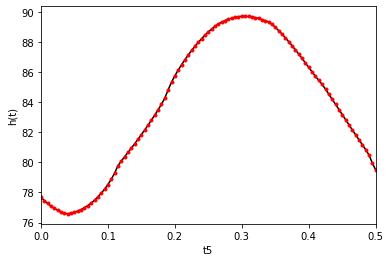

In [ ]:
Fc = 1.89 
Fs5 = 200
N5 = 1000
n5 = np.arange(N5)
t5 = n5/Fs5
h = np.zeros(N5) #tiempo
h1 = np.zeros(N5) #frecuencia
for j in n5:
    h[j] = 80+sum((2*(80)**(1/2))/(np.pi*(2*n5**2-1))*np.cos(2*np.pi*(n5-1)*Fc*t5[j]-(3*n5**3-1)*np.pi/7))
    h1[j] = 80+sum((2*(80)**(1/2))/(np.pi*(2*n5**2-1))*np.cos(2*np.pi*(n5-1)*Fc/Fs5*j-(3*n5**3-1)*np.pi/7))


plt.plot(t5,h,color='k')
plt.plot(n5/Fs5,h1,'o',color='red',ms=3)
plt.ylabel('h(t)')
plt.xlabel('t5')
plt.xlim(0,0.5)
plt.show()

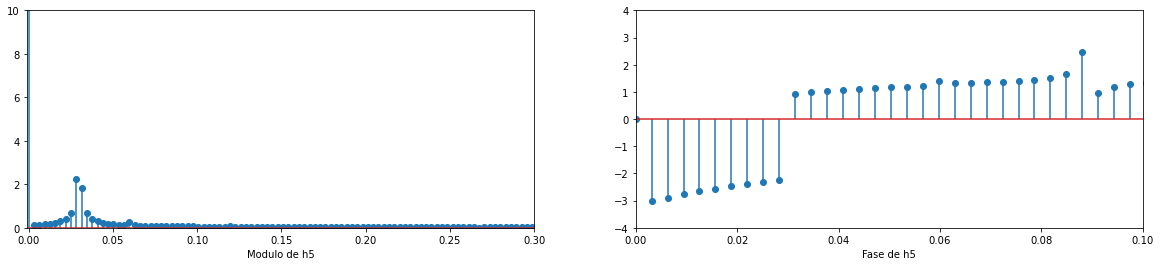

In [ ]:
h5=fft(h)/len(h)
w5=np.linspace(0,np.pi,len(n5))
mod5=np.zeros(len(n5))
phi5=np.zeros(len(n5))

for i in n5:
    (mod5[i],phi5[i])=cmath.polar(h5[i])

plt.figure(figsize=(20,4))
plt.subplot(121)
plt.stem(w5,abs(h5))
plt.xlabel('w5')
plt.xlabel('Modulo de h5')
plt.xlim(-0.001,0.30) 
plt.ylim(0,10) #para ver con mayor claridad las componentes pequeñas
plt.subplot(122)
plt.stem(w5,phi5)
plt.xlabel('w5')
plt.xlabel('Fase de h5')
plt.xlim(0,0.10) 
plt.ylim(-4,4)
plt.show()

Al no haber ciclos completos, el espectro presenta señales espurias.

#### APARTADO B

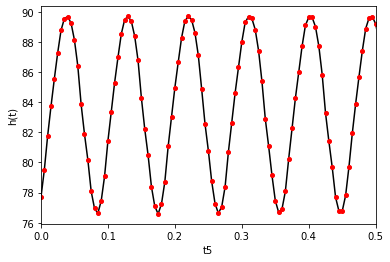

In [ ]:
Fc = 1.89 
Fs5 = 200
N5 = 1000
n5 = np.arange(N5)
t5 = n5/Fs5
h_1 = np.zeros(N5)
h1_1 = np.zeros(N5)
for j in n5:
    h_1[j] = 80+sum((2*(80)**(1/2))/(np.pi*(2*n5**2-1))*np.cos(2*np.pi*(n5-1)*Fc*100*t5[j]-(3*n5**3-1)*np.pi/7))
    h1_1[j] = 80+sum((2*(80)**(1/2))/(np.pi*(2*n5**2-1))*np.cos(2*np.pi*(n5-1)*Fc*100/Fs5*j-(3*n5**3-1)*np.pi/7))


plt.plot(t5,h_1,color='k')
plt.plot(n5/Fs5,h1_1,'o',color='red',ms=4)
plt.ylabel('h(t)')
plt.xlabel('t5')
plt.xlim(0,0.5)
plt.show()

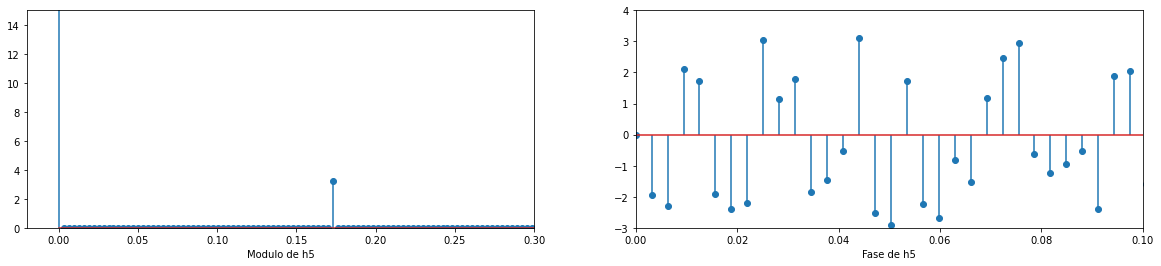

In [ ]:
h5=fft(h_1)/len(h_1)
w5=np.linspace(0,np.pi,len(n5))
mod5=np.zeros(len(n5))
phi5=np.zeros(len(n5))

for i in n5:
    (mod5[i],phi5[i])=cmath.polar(h5[i])

    
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.stem(w5,mod5)
plt.xlabel('w5')
plt.xlabel('Modulo de h5')
plt.xlim(-0.02,0.30) 
plt.ylim(0,15) #para ver con mayor claridad las componentes pequeñas
plt.subplot(122)
plt.stem(w5,phi5)
plt.xlabel('w5')
plt.xlabel('Fase de h5')
plt.xlim(0,0.10) 
plt.ylim(-3,4)
plt.show()

Para ciclos completos se decidio multiplicar fc por 100.

#### APARTADO D

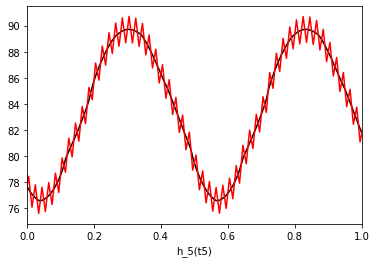

In [ ]:
#d)
ruido1= 1*np.sin(2*np.pi*50*t5)
h_5=h+ ruido1
plt.plot(t5,h,color='k')
plt.plot(t5,h_5,color='r')
plt.xlabel('t5')
plt.xlabel('h_5(t5)')
plt.xlim(0,1)
plt.show()

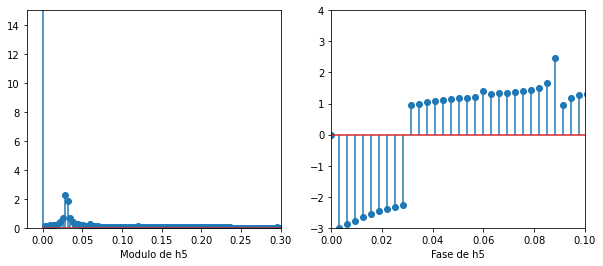

In [ ]:
h5_1=fft(h_5)/len(n5)
w5_1=np.linspace(0,np.pi,len(n5))
mod5_1=np.zeros(len(n5))
phi5_1=np.zeros(len(n5))
for i in n5:
    (mod5_1[i],phi5_1[i])=cmath.polar(h5_1[i])
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.stem(w5_1,abs(h5_1))
plt.xlabel('w5')
plt.xlabel('Modulo de h5')
plt.xlim(-0.02,0.30) 
plt.ylim(0,15) #para ver con mayor claridad las componentes pequeñas
plt.subplot(122)
plt.stem(w5_1,phi5_1)
plt.xlabel('w5')
plt.xlabel('Fase de h5')
plt.xlim(0,0.10) 
plt.ylim(-3,4)
plt.show()

/var/folders/42/1qzjx_y92x78ljc88vyh5hm80000gn/T/ipykernel_21764/2923912199.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "oc" (-> color='c'). The keyword argument will take precedence.
  plt.plot(n5/Fs5,h1_1,'oc',color='yellow',ms=2)


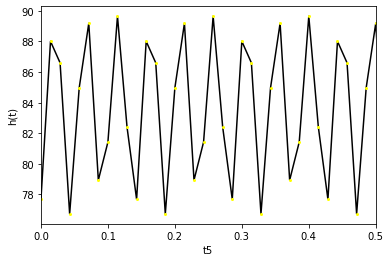

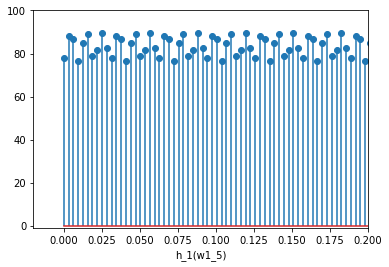

In [ ]:
#e) fs=70
Fc=1.89 
Fs5=70
N5=1000
n5=np.arange(N5)
t5=n5/Fs5
h_1=np.zeros(N5)
h1_1=np.zeros(N5)
for j in n5:
    h_1[j]=80+sum((2*(80)**(1/2))/(np.pi*(2*n5**2-1))*np.cos(2*np.pi*(n5-1)*Fc*100*t5[j]-(3*n5**3-1)*np.pi/7))
    h1_1[j]=80+sum((2*(80)**(1/2))/(np.pi*(2*n5**2-1))*np.cos(2*np.pi*(n5-1)*Fc*100/Fs5*j-(3*n5**3-1)*np.pi/7))
plt.plot(t5,h_1,color='k')
plt.plot(n5/Fs5,h1_1,'oc',color='yellow',ms=2)
plt.ylabel('h(t)')
plt.xlabel('t5')
plt.xlim(0,0.5)
plt.show()
h1_5=fft(h_1)/len(h_1)
w1_5=np.linspace(0,np.pi,len(h_1))
plt.stem(w1_5,abs(h_1))
plt.xlabel('w1_5')
plt.xlabel('h_1(w1_5)')
plt.xlim(-0.02,0.2) 
plt.ylim(-1,100) #para ver con mayor claridad las componentes pequeñas
plt.show()

- - -